# Final Project Marketing Campaign 

## 1. Descriptive stat (+import data):

- Dian Munawaroh

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("marketing_campaign.csv",sep=";")

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


membuat column baru untuk umur

In [6]:
df["age"] =2023 -df["Year_Birth"] 
df
columns = df.columns.tolist()
old_column_index = columns.index('age')
columns.pop(old_column_index)
columns.insert(2, 'age')
df = df.reindex(columns=columns)
df.head()

,ID,Year_Birth,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,66,Graduation,Single,58138.0,0,0,04/09/2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,69,Graduation,Single,46344.0,1,1,08/03/2014,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,58,Graduation,Together,71613.0,0,0,21/08/2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,39,Graduation,Together,26646.0,1,0,10/02/2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,42,PhD,Married,58293.0,1,0,19/01/2014,94,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   age                  2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

Observations:

DataSets Memiliki 29 kolom dan 2240 baris data
DataSets Terdapat 3 jenis tipe data yaitu : int64,object,float64
DataSets kolom income memiliki 2216 nilai non-null, dan 24 nilai null

### cek duplikat dan Null

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
age                     0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
(df.isna().sum()/df.shape[0]*100)['Income']

1.0714285714285714

terdapat 1.07% data yang hilang atau null

### Numerik

In [11]:
nums=['Year_Birth','age','Income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Kidhome',
       'Teenhome']

In [12]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
age,2240.0,54.194196,11.984069,27.0,46.00,53.0,64.00,130.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0


household Income:

Rata Rata (mean) adalah 52247.25 dan Median nya adalah 51381.5 dari data tersebut dapat disimpulkan bahwa rata-rata lebih besar dari pada median maka menggambarkan sedikit right-skewed distribution
selanjutnya mempunyai range 1730.0 (minimal) ke 666666.0(maximal) yang sangat jauh, menandakan adanya outliers sehingga perlu dilakukan data preprocessing atau segmentasi pada data income sebelum melanjutkan ke tahap pemodelan
Recency:

Rata Rata (mean) dan median memiliki kesamaan yang artinya adalah normal-skewed distribiution
memiliki rentang sangat tinggi yaitu 0 ke 99.0 berarti Jumlah terkakhir pembelian
MntFruits:

rata rata (mean) dan median 2 tahun terakhir adalah

### Categorical

In [13]:
cat =['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain']

In [14]:
for column in cat:
    print(df[column].value_counts(normalize=True))
    print("-" * 40)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
----------------------------------------
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64
----------------------------------------
0    0.925446
1    0.074554
Name: AcceptedCmp4, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp5, dtype: float64
----------------------------------------
0    0.935714
1    0.064286
Name: AcceptedCmp1, dtype: float64
----------------------------------------
0    0.986607
1    0.013393
Name: AcceptedCmp2, dtype: float64
----------------------------------------
0    0.990625
1    0.009375
Name: Complain, dt

1. dalam kategori Education 2n Cycle dan Master memliki arti yang sama.
dalam Kategori Martial Status Single dan Alone Memiliki arti yang sama
dalam Kategori Martial Statu ada beberapa data yang tidak jelas apa yang dimaksud yaitu "Absurd" dan "YOLO", maka disarankan digabung dan diganti "other"

## 2. Univariate analysis:

- Chantika Azzamy S. Yahya
- Siti Muthmainah D

## 3. Multivariate analysis

- Andika Bumi Anugrah
- Muhammad Hadyan

## 4. Business insight:

- Kimberly Bianca

## 5. Git:

- Nur Syamsu Wais Al Qorni

1. Membuat Organization untuk final project yang bernama Final-Project-Nol-Bir-Rakamin-DS28
2. masukan anggota kedalam Organization
3. membuat Repositories bernama Marketing-Campaign 
4. memamasukan anggota  kedalam Repositories untuk dapat mengerjakan task masing masing, dan mengubah role ke admin
5. memasukan file ipynb dan README.md menggunakan push
6. membuat branch untuk masing masing anggota
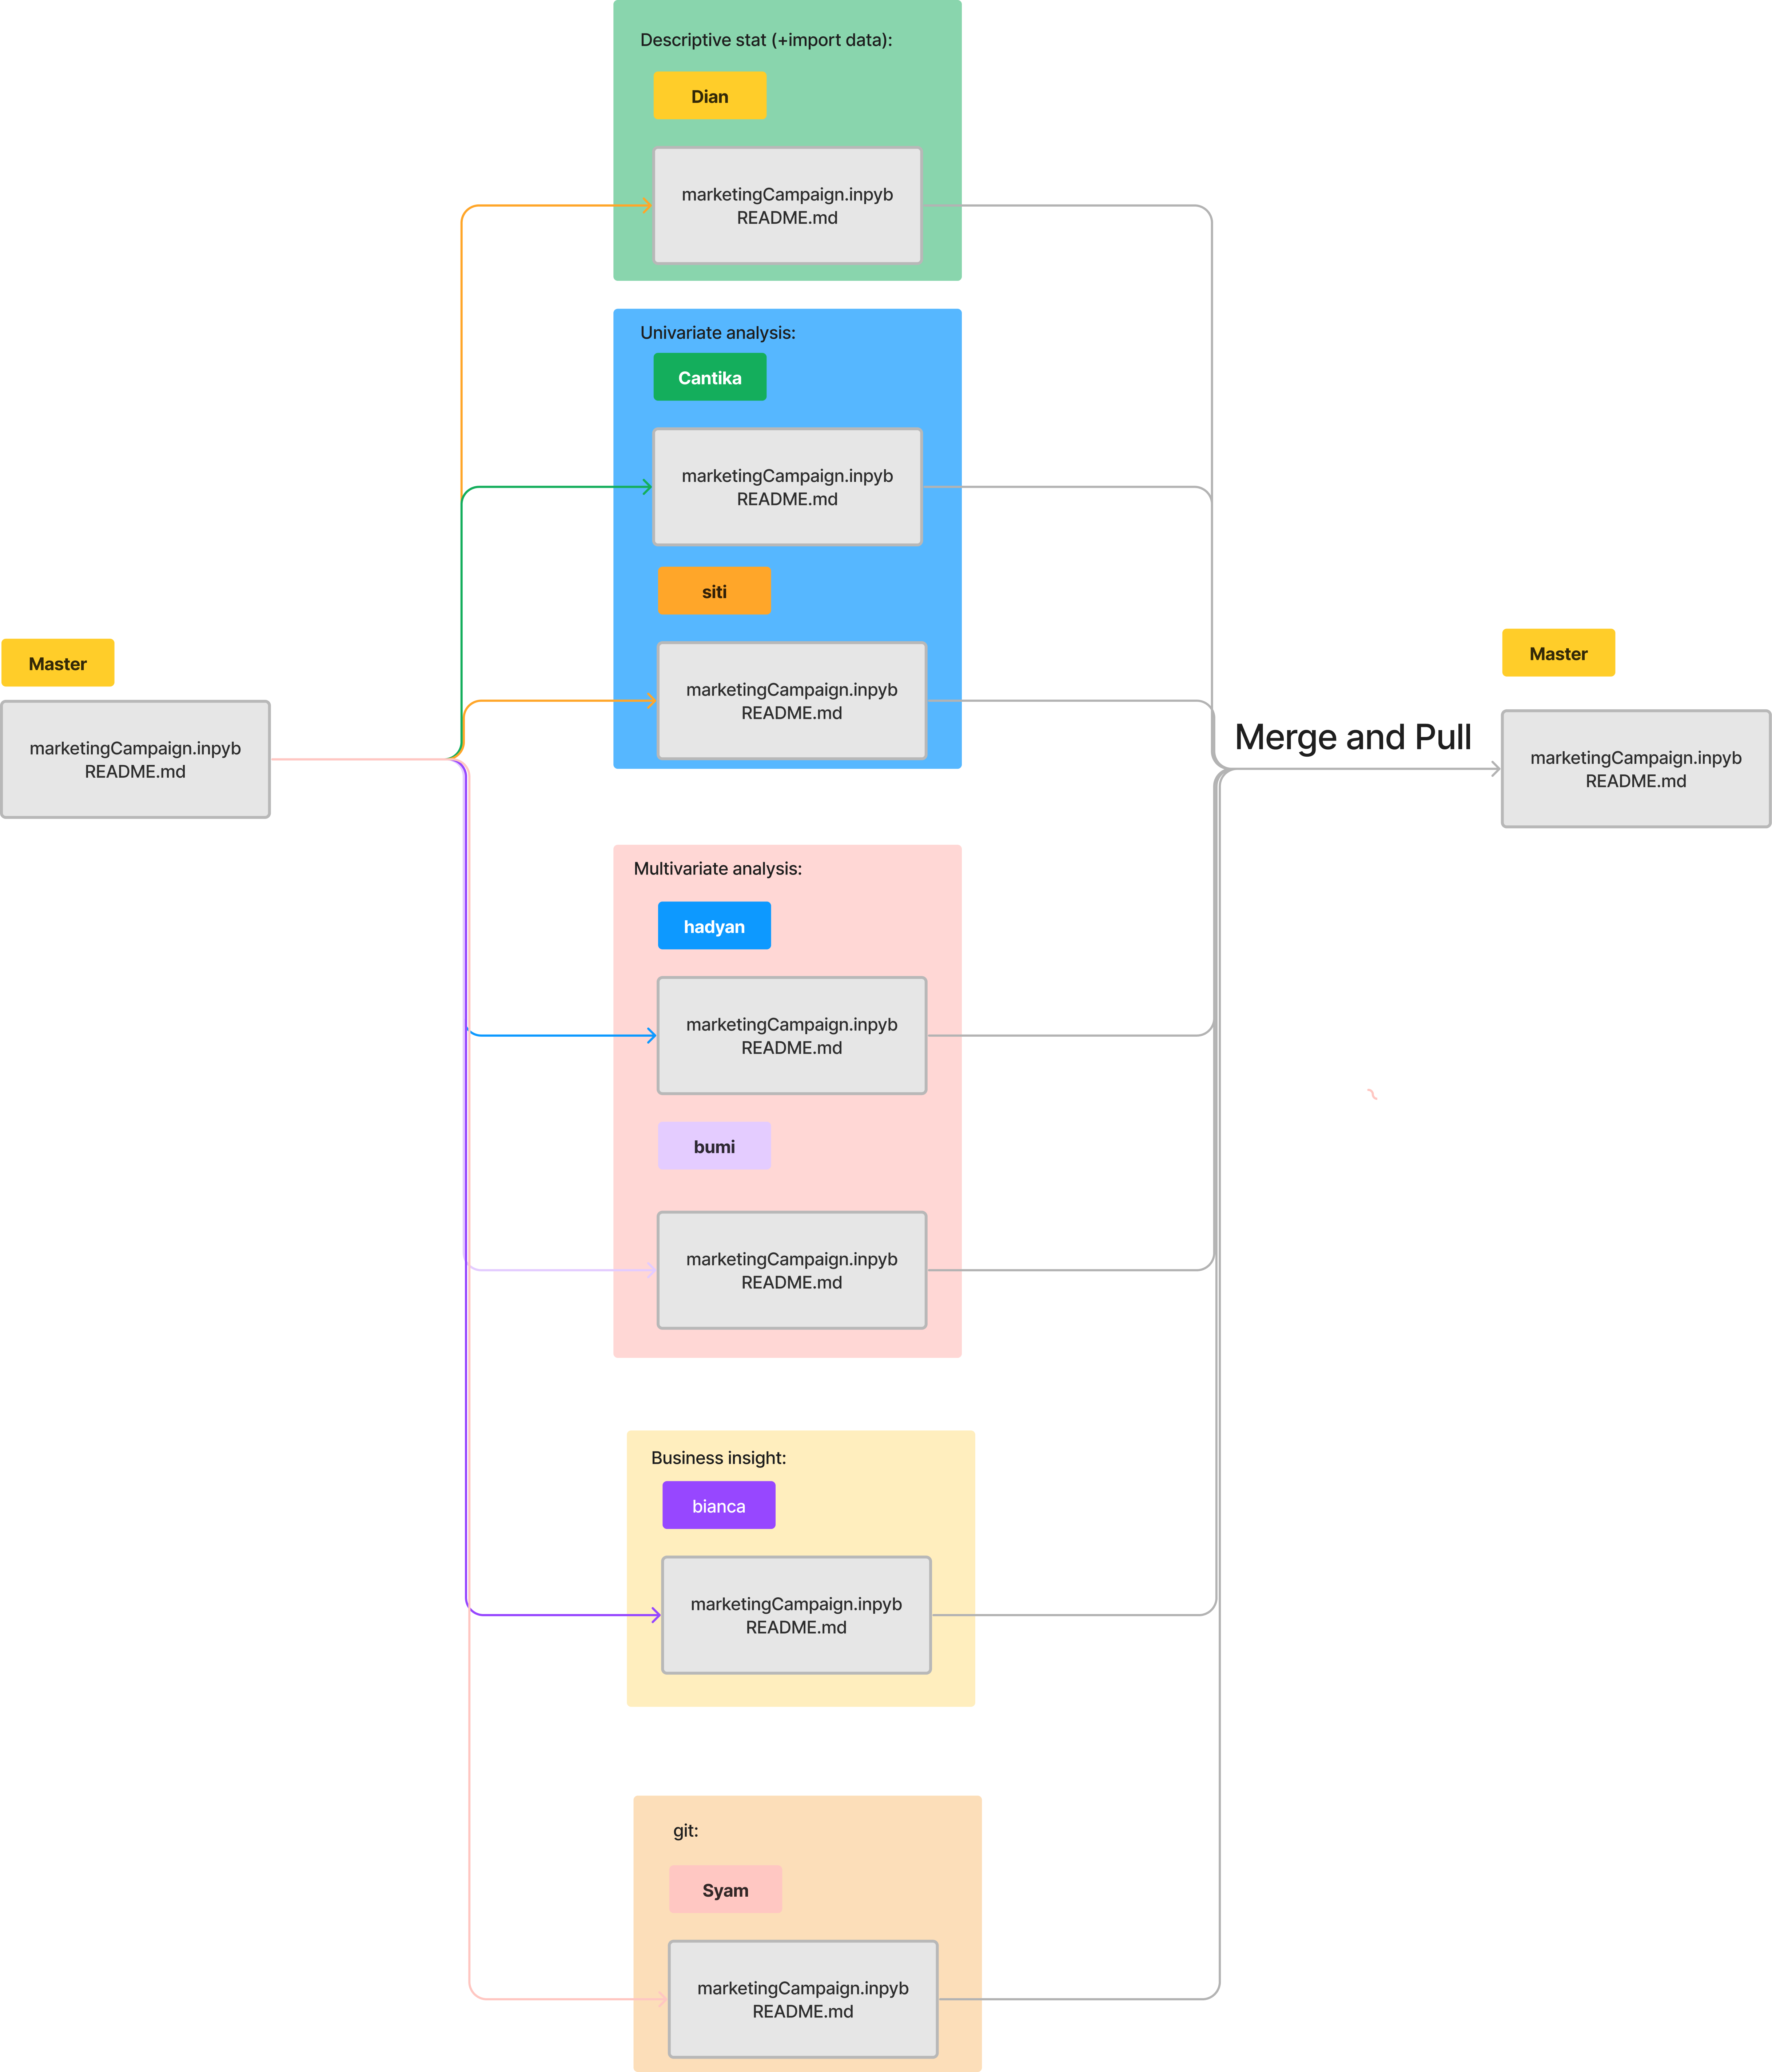
